# 3.1. Contact with Spiral Torus

1. Does the contact point between the ball and the Spiral Torus lie in the plane of the Frenet coordinate system, and does the long diameter of the contact ellipse also lie in the plane?

![Asset1](Asset1.svg)

2. Where does the force balance in a ball sandwiched between two Spiral Torus? 

![Asset4](Asset4.svg)

These questions will be examined.

## 3.1.1. Create a mesh on the Spiral Torus and measure the distance
Create a mesh on top of the Spiral Torus and measure the distance to a point.

![Asset2](Asset2.svg)



In [1]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.collections import LineCollection


In [3]:
import sys
import pathlib
import os
sys.path.append(str(pathlib.Path(os.path.abspath('')).resolve().parent.parent))
from IPython.display import display, HTML

from _9_Mechanics.Spiral import Spiral
from _9_Mechanics.Tribology import Tribology

TB = Tribology()


In [4]:
R = 6.35 / 2
Rg = R * 1.08
dR = R * 0.08 / np.sqrt(2)
PCR = 20.875
SP0 = Spiral(alp=np.deg2rad(0e-3), l=10.0, r=PCR, eta=np.array([[-dR, -dR],[0,0]]), R=np.array([Rg, 0]))


In [5]:
def plot_2d_mesh(x, y, xl='', yl=''):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(x, y)
    ax.set_aspect('equal', adjustable='box')

    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    plt.gca().add_collection(LineCollection(segs1))
    plt.gca().add_collection(LineCollection(segs2))
    plt.xlabel(xl)
    plt.ylabel(yl)
    return ax


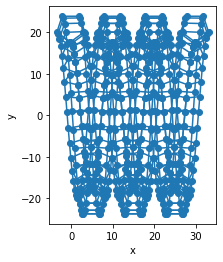

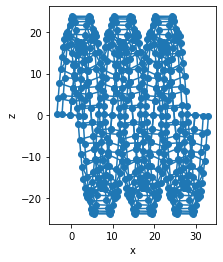

In [6]:
th = np.deg2rad(np.linspace(0, 1080, int(1e2)))
alp = np.deg2rad(np.linspace(0, 360, int(6)))

xyz = SP0.get_mesh(th, alp, 0)

fig = plot_2d_mesh(xyz[:,:,0], xyz[:,:,1], 'x', 'y')
fig = plot_2d_mesh(xyz[:,:,0], xyz[:,:,2], 'x', 'z')
plt.show()


Assume the surface of a ball screw and create a mesh at a contact angle of 45 degrees.

![Asset3](Asset3.svg)


dth = 0.07174105369575173 [mm]
dalp = 0.06649600252244033 [mm]


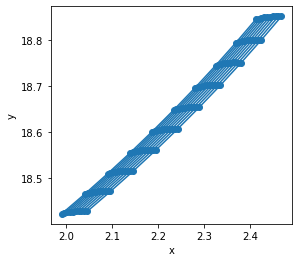

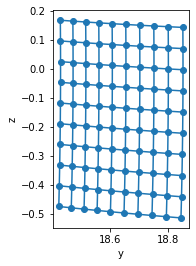

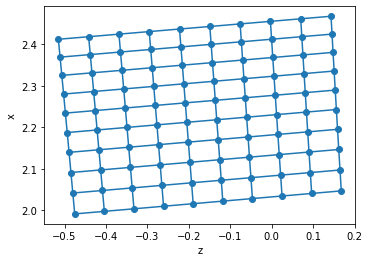

In [7]:
th = np.deg2rad(np.linspace(-1.0, 1.0, int(1e1)))
alp = np.deg2rad(np.linspace(40, 50, int(1e1)))

xyz = SP0.get_mesh(th, alp, 0)
print('dth = '  + str(np.linalg.norm(xyz[1,0,:] - xyz[0,0,:])) + ' [mm]')
print('dalp = ' + str(np.linalg.norm(xyz[0,1,:] - xyz[0,0,:])) + ' [mm]')

fig = plot_2d_mesh(xyz[:,:,0], xyz[:,:,1], 'x', 'y')
fig = plot_2d_mesh(xyz[:,:,1], xyz[:,:,2], 'y', 'z')
fig = plot_2d_mesh(xyz[:,:,2], xyz[:,:,0], 'z', 'x')
plt.show()

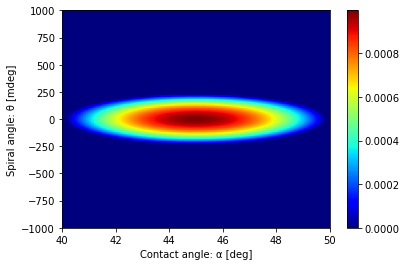

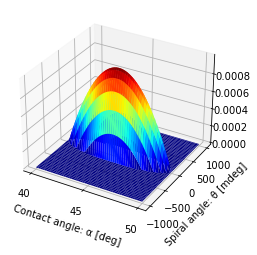

In [8]:
th = np.deg2rad(np.linspace(-1.0, 1.0, int(1e2)))
alp = np.deg2rad(np.linspace(40, 50, int(1e2)))

xyz = SP0.get_mesh(th, alp, 0)

x_ball = np.array([0., PCR, 0.])
R_ball = R + 1e-3

Disp_xyz = x_ball - xyz
Disp = R_ball - np.sqrt(np.sum(np.square(Disp_xyz), 2))
Disp[Disp<0.0] = 0.0

plt.imshow(Disp, cmap=cm.jet, extent=np.rad2deg([alp[0], alp[-1], 1e3 *th[0], 1e3 *th[-1]]), aspect='auto')
plt.xlabel('Contact angle: α [deg]')
plt.ylabel('Spiral angle: θ [mdeg]')
plt.colorbar()
plt.show()

Th, Alp = np.meshgrid(th, alp)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(np.rad2deg(Alp), 1e3 * np.rad2deg(Th), Disp.T, cmap=cm.jet)
ax.set_xticks([40, 45, 50])
ax.set_xlabel('Contact angle: α [deg]')
ax.set_ylabel('Spiral angle: θ [mdeg]')
plt.show()


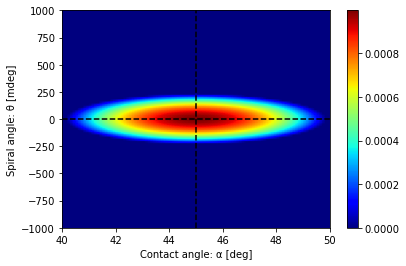

Center Contact angle: α = 44.995508348703204 [deg]
Center Spiral angle:  θ = -0.0006650266603639604 [mdeg]


In [9]:
x_mean = alp @ np.mean(Disp, axis=0) / np.mean(Disp, axis=0).sum()
y_mean = th @ np.mean(Disp, axis=1) / np.mean(Disp, axis=1).sum()

plt.imshow(Disp, cmap=cm.jet, extent=np.rad2deg([alp[0], alp[-1], 1e3*th[0], 1e3*th[-1]]), aspect='auto')
plt.axvline(x=np.rad2deg(x_mean), color='black', linestyle='--')
plt.axhline(y=1e3*np.rad2deg(y_mean), color='black', linestyle='--')
plt.xlabel('Contact angle: α [deg]')
plt.ylabel('Spiral angle: θ [mdeg]')
plt.colorbar()
plt.show()

print('Center Contact angle: α = ' + str(np.rad2deg(x_mean)) + ' [deg]')
print('Center Spiral angle:  θ = ' + str(1e3 * np.rad2deg(y_mean)) + ' [mdeg]')

## 3.1.1. Conclusion

- The distance between the surface of the spiral torus and some arbitrary point was determined. Here we do not deal with algebraic calculations, but only one representative example.
- The intersection point of the spiral tube and the ball can be well represented on a plane perpendicular to the center of the spiral.
- The spiral is the simplest mathematical expression with curvature and tortuosity. The fact that the center of the spiral, the center of the ball, the point of contact, and the length diameter of the contact ellipse all ride on the same plane suggests that in order to consider contact with a torus (here meaning the direct product set of the unit circumference), we must first find the center of the torus.

## 3.1.2. Force balance between two Spiral Torus

Find a position where the force is balanced. The space is smaller than the diameter of the ball. The load is set to be about 50N.


In [10]:
SP1 = Spiral(alp=np.deg2rad(1e-1), l=10.0, r=PCR, eta=np.array([[-dR, -dR],[-dR, dR]]), R=np.array([Rg, Rg]))
SP2 = Spiral(alp=np.deg2rad(-1e-1), l=10.0, r=PCR, eta=np.array([[dR, dR],[dR, -dR]]), R=np.array([Rg, Rg]))

rho = 7.9e-3 # [g/mm^3]
Ball_m = 4/3 * np.pi * R**3 * rho # [g]
Ball_r_inv = 1.0 / R
v_ball = np.zeros(3)
zeta = 0.3
xv_ball = np.concatenate([x_ball, v_ball])
E_Reduced = 231e3 # [N/mm^2]


In [11]:
def va_ball(xv_ball, t, R, SP1, SP2, Ball_r_inv, zeta, E_Reduced):
    x_ball = xv_ball[:3]
    v_ball = xv_ball[3:]
    
    cos_sin1, dx1, exyz1 = SP1.get_contact(x_ball, R, 0)
    SP1_r_inv = SP1.get_rho(cos_sin1[0], 0)
    R_Reduced1 = 1.0 / (Ball_r_inv + SP1_r_inv)
    k1, a1, b1 = TB.BrewHamrock(R_Reduced1[0], R_Reduced1[1], dx1, E_Reduced)
    v1 = v_ball.dot(exyz1)
    F1 = - TB.Tsuji(k1, zeta, Ball_m, v1, dx1) * exyz1

    cos_sin2, dx2, exyz2 = SP2.get_contact(x_ball, R, 0)
    SP2_r_inv = SP2.get_rho(cos_sin2[0], 0)
    R_Reduced2 = 1.0 / (Ball_r_inv + SP2_r_inv)
    k2, a2, b2 = TB.BrewHamrock(R_Reduced2[0], R_Reduced2[1], dx2, E_Reduced)
    v2 = v_ball.dot(exyz2)
    F2 = - TB.Tsuji(k2, zeta, Ball_m, v2, dx2) * exyz2

    a_ball = (F1 + F2) / Ball_m
    
    return np.concatenate([v_ball, a_ball])


Text(0, 0.5, 'y [mm]')

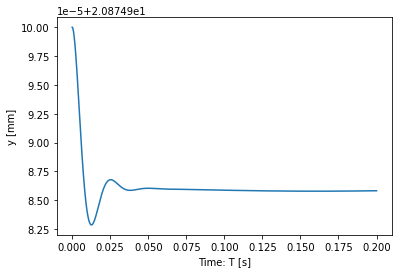

In [12]:
from scipy.integrate import odeint
t = np.linspace(0, 0.2, 1000)
sol = odeint(va_ball, xv_ball, t, args=(R, SP1, SP2, Ball_r_inv, zeta, E_Reduced))

fig, ax = plt.subplots()
ax.plot(t, sol[:,1])

plt.xlabel('Time: T [s]')
plt.ylabel('y [mm]')


The geometric positioning is shown in the following figure.

![Asset5](Asset5.svg)

$$
x_{11} \perp x_{12}, x_{12} \perp x_{13}, x_{13} \perp x_{11}
$$

$$
x_{21} \perp x_{22}, x_{22} \perp x_{23}, x_{23} \perp x_{21}
$$


In [13]:
x_end = sol[-1,:3]

eta1 = SP1.to_eta2(x_end)
xyz2eta1 = SP1.get_xyz2eta(eta1[0])
t1 = xyz2eta1.T @ np.array([1.0, 0.0, 0.0])

eta2 = SP2.to_eta2(x_end)
xyz2eta2 = SP2.get_xyz2eta(eta2[0])
t2 = xyz2eta2.T @ np.array([1.0, 0.0, 0.0])

np.rad2deg(np.arccos(t1.dot(t2)))


0.001152503033434576

$\angle x_{11} x_{21} = 1.15$
[mdeg]


In [14]:
cos_sin1, dx1, exyz1 = SP1.get_contact(x_end, R, 0)
cos_sin2, dx2, exyz2 = SP2.get_contact(x_end, R, 0)

np.rad2deg(np.arccos(-exyz1.dot(exyz2)))


0.0008110952990346056

$\angle x_{12} x_{22} = 0.81$
[mdeg]


In [15]:
b1 = np.cross(t1, exyz1)
b2 = np.cross(t2, exyz2)

np.rad2deg(np.arccos(- b1.dot(b2)))


0.0008235305157998825

$\angle x_{13} x_{23} = 0.82$
[mdeg]


## 3.1.2. Summary
- Assuming that the spiral groove and the ball were iron and had realistic contact stiffness, the force balance position was determined by vibrating them for a certain time (0.2 seconds).
- As expected, the results suggested that the surface velocities of both spirals were different from each other.
- An unexpected result was obtained, which was that the vertical loads were not balanced. This is thought to be due to the fact that the curvature and stiffness of both spirals are different, which breaks the symmetry and causes the geometric force balance position to disappear.
- In reality, this problem does not occur often (or is overlooked because it is minute). Because in reality, the forces are balanced somewhere because of friction.

## Appendix (Long Time Calculation)

Since
$
\angle x_{12} x_{22} = 0.81 \text{[mdeg]} \neq 0
$
, it accelerates without limit, and the velocity diverges.


Text(0, 0.5, 'y [mm]')

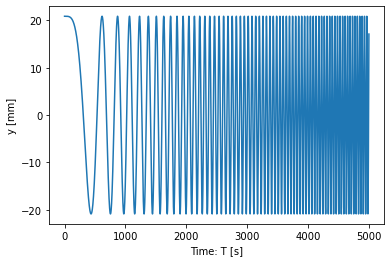

In [16]:
from scipy.integrate import odeint
t = np.linspace(0, 5000, 10000)
sol = odeint(va_ball, xv_ball, t, args=(R, SP1, SP2, Ball_r_inv, zeta, E_Reduced))

fig, ax = plt.subplots()
ax.plot(t, sol[:,1])

plt.xlabel('Time: T [s]')
plt.ylabel('y [mm]')
